In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

#Scaling & Dataset Split
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

#OLS, Lasso, Ridge
from sklearn.linear_model import LinearRegression, Lasso, Ridge

#Model Evaluation
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
#Load Dataset
df = pd.read_csv("F:\Documents\Downloads\insurance.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
#Converting into numerical values
df['sex'] = df['sex'].replace({'male':1, 'female':0})
df['smoker'] = df['smoker'].replace({'yes':1, 'no':0})
df['region'] = df['region'].replace({'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4})

In [5]:
#Dealing with missing values
df = df.replace(np.nan, 0)

In [6]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,3,10600.54830
1334,18,0,31.920,0,0,4,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,1,2007.94500


In [7]:
insurance = df.iloc[:,0:6]
charges = df.iloc[:,6]

In [8]:
#Converting target column in terms of thousands
charges = (charges).apply(lambda x: x*0.001)
charges

0       16.884924
1        1.725552
2        4.449462
3       21.984471
4        3.866855
          ...    
1333    10.600548
1334     2.205981
1335     1.629833
1336     2.007945
1337    29.141360
Name: charges, Length: 1338, dtype: float64

In [9]:
#Standardize & Train/Test Split
insurance = preprocessing.scale(insurance)
x_train, x_test, y_train, y_test = train_test_split(insurance, charges, test_size = 0.3, random_state = 10)

### Linear Regression

In [10]:
ols = LinearRegression()
ols.fit(x_train, y_train)
ols_pred = ols.predict(x_test)
mean_squared_error(y_test, ols_pred)

36.57777709059156

In [11]:
np.sqrt(mean_squared_error(y_test, ols_pred))

6.047956439210815

In [12]:
#Beta Values with respect to the feature name i.e. crime rate, etc.
ols.coef_

array([ 3.75084794, -0.13823849,  2.026829  ,  0.7433247 ,  9.79066763,
        0.31766568])

### Lasso Regression

In [13]:
lasso_reg = Lasso(alpha = 0.5)
lasso_reg.fit(x_train, y_train)
lasso_reg.coef_
lasso_pred = lasso_reg.predict(x_test)
mean_squared_error(y_test, lasso_pred)

35.992922690415725

In [14]:
lasso_reg = Lasso(alpha = 0.5)
lasso_reg.fit(x_train, y_train)
lasso_df = pd.DataFrame({'variable': df.iloc[:,0:6].columns, 'estimate':lasso_reg.coef_})
lasso_train_pred = []
lasso_test_pred = []

In [15]:
lasso_reg.coef_

array([ 3.35217037, -0.        ,  1.5666462 ,  0.25664061,  9.27459412,
        0.        ])

In [16]:
#Iterate Lambdas
for alpha in np.arange(0, 1, 0.1):
    
    #Training
    lasso_reg = Lasso(alpha = alpha)
    lasso_reg.fit(x_train, y_train)
    var_name = 'estimate' + str(alpha)
    lasso_df[var_name] = lasso_reg.coef_
    
    #Prediction
    lasso_train_pred.append(lasso_reg.predict(x_train))
    lasso_test_pred.append(lasso_reg.predict(x_test))
    
#Organize Dataframe
lasso_df = lasso_df.set_index('variable').T.rename_axis('estimate').rename_axis(None).reset_index() #Transpose

<ipython-input-16-ae63a8ffcbf2>:6: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso_reg.fit(x_train, y_train)
C:\Users\VIREN ( RELIANCE )\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\VIREN ( RELIANCE )\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17150.05427479004, tolerance: 14.37728340165142
  model = cd_fast.enet_coordinate_descent(


In [17]:
lasso_df.head()

variable,index,age,sex,bmi,children,smoker,region
0,estimate,3.352170,-0.000000,1.566646,0.256641,9.274594,0.000000
1,estimate0.0,3.750848,-0.138238,2.026829,0.743325,9.790668,0.317666
2,estimate0.1,3.676036,-0.019050,1.920011,0.644102,9.681653,0.199439
3,estimate0.2,3.595269,-0.000000,1.822352,0.546858,9.580364,0.085367
4,estimate0.30000000000000004,3.513658,-0.000000,1.729943,0.450032,9.479854,0.000000


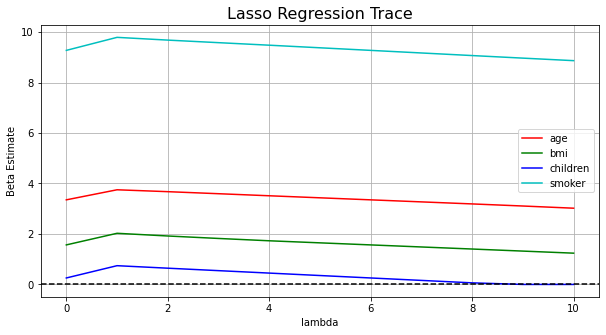

In [18]:
#Plot Betas by Lambda
fig, ax = plt.subplots(figsize = (10,5))
ax.plot(lasso_df.age, 'r', lasso_df.bmi, 'g', lasso_df.children, 'b', lasso_df.smoker, 'c')
ax.axhline(y = 0, color = 'black', linestyle = '--')
ax.set_xlabel('lambda')
ax.set_ylabel('Beta Estimate')
ax.set_title('Lasso Regression Trace', fontsize = 16)
ax.legend(labels = ['age', 'bmi', 'children', 'smoker']) #Other variables become 0 by lambda = 0.2/0.3
ax.grid(True)

Text(0, 0.5, 'MSE')

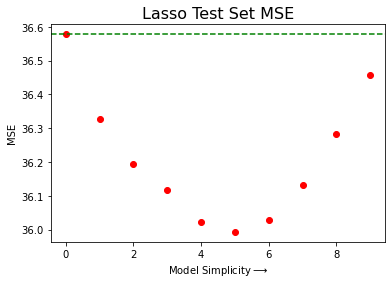

In [19]:
#MSE  of Lasso & OLS
lasso_mse_test = [mean_squared_error(y_test, p) for p in lasso_test_pred]
ols_mse = mean_squared_error(y_test, ols_pred)

#Plot MSE
plt.plot(lasso_mse_test[:25], 'ro')
plt.axhline(y = ols_mse, color = 'g', linestyle = '--')
plt.title('Lasso Test Set MSE', fontsize = 16)
plt.xlabel('Model Simplicity$\longrightarrow$')
plt.ylabel('MSE')

### Ridge Regression

In [20]:
ridge_reg = Ridge(alpha = 9)
ridge_reg.fit(x_train, y_train)

Ridge(alpha=9)

In [21]:
ridge_reg.coef_

array([ 3.71728444, -0.12973293,  2.01310954,  0.73587367,  9.69670574,
        0.31373249])

In [22]:
pred = ridge_reg.predict(x_test)
pred_train = ridge_reg.predict(x_train)

In [23]:
mean_squared_error(y_test, pred)

36.43759505347803

In [24]:
np.sqrt(mean_squared_error(y_train, pred_train))

6.054396445571829

In [25]:
#Initialize
ridge_reg = Ridge(alpha = 0)
ridge_reg.fit(x_train, y_train)
ridge_df = pd.DataFrame({'variable': df.iloc[:,0:6].columns, 'estimate': ridge_reg.coef_})
ridge_train_pred = []
ridge_test_pred = []

In [26]:
#Iterate Lambdas
for alpha in np.arange(0, 20000, 10):
    #Training
    ridge_reg = Ridge(alpha = alpha)
    ridge_reg.fit(x_train, y_train)
    var_name = 'estimate' + str(alpha)
    ridge_df[var_name] = ridge_reg.coef_
    
    #Prediction
    ridge_train_pred.append(ridge_reg.predict(x_train))
    ridge_test_pred.append(ridge_reg.predict(x_test))
    
#Organize Dataframe
ridge_df = ridge_df.set_index('variable').T.rename_axis('estimate').rename_axis(None).reset_index()

In [27]:
ridge_df

variable,index,age,sex,bmi,children,smoker,region
0,estimate,3.750848,-0.138238,2.026829,0.743325,9.790668,0.317666
1,estimate0,3.750848,-0.138238,2.026829,0.743325,9.790668,0.317666
2,estimate10,3.713593,-0.128806,2.011596,0.735055,9.686377,0.313301
3,estimate20,3.677076,-0.119733,1.996578,0.726975,9.584298,0.309038
4,estimate30,3.641277,-0.111002,1.981770,0.719076,9.484361,0.304873
...,...,...,...,...,...,...,...
1996,estimate19950,0.180409,0.027521,0.121548,0.033097,0.437994,0.007636
1997,estimate19960,0.180323,0.027509,0.121490,0.033081,0.437784,0.007632
1998,estimate19970,0.180238,0.027496,0.121433,0.033065,0.437575,0.007628
1999,estimate19980,0.180152,0.027484,0.121376,0.033050,0.437366,0.007624


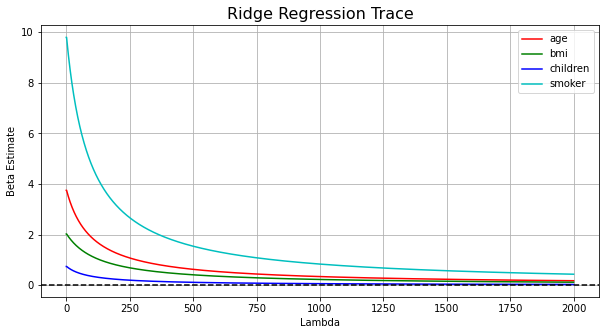

In [28]:
#Plot Betas by Lambda
fig, ax = plt.subplots(figsize = (10,5))
ax.plot(ridge_df.age, 'r', ridge_df.bmi, 'g', ridge_df.children, 'b', ridge_df.smoker, 'c')
ax.axhline(y = 0, color = 'black', linestyle = '--')
ax.set_xlabel('Lambda')
ax.set_ylabel('Beta Estimate')
ax.set_title('Ridge Regression Trace', fontsize = 16)
ax.legend(labels = ['age', 'bmi', 'children', 'smoker'])
ax.grid(True)

In [29]:
ols_pred = ols.predict(x_test)

Text(0, 0.5, 'MSE')

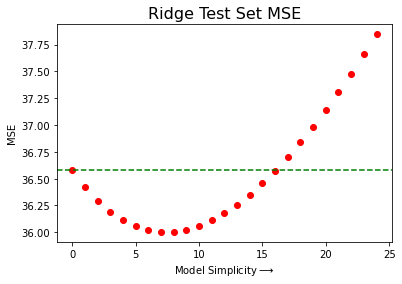

In [30]:
#MSE of Ridge & OLS
ridge_mse_test = [mean_squared_error(y_test, p) for p in ridge_test_pred]
ols_mse = mean_squared_error(y_test, ols_pred)

#Plot MSE
plt.plot(ridge_mse_test[:25], 'ro')
plt.axhline(y = ols_mse, color = 'g', linestyle = '--')
plt.title('Ridge Test Set MSE', fontsize = 16)
plt.xlabel('Model Simplicity$\longrightarrow$')
plt.ylabel('MSE')